### LendingClub loan classification model

#### Data pre-processing

In [1]:
import pandas as pd
import numpy as np
import statistics as st # for calculating mean and stdev.

# load data
loan_train_data = pd.read_csv("./loan_train.csv")
loan_test_data = pd.read_csv("./loan_test.csv")

# check data type
print(type(loan_train_data))
print(type(loan_test_data))

# understand dataset
print(loan_train_data.keys())
print(loan_test_data.keys())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Index(['grade', 'sub_grade', 'short_emp', 'emp_length_num', 'home_ownership',
       'dti', 'purpose', 'term', 'last_delinq_none', 'last_major_derog_none',
       'revol_util', 'total_rec_late_fee', 'bad_loans'],
      dtype='object')
Index(['grade', 'sub_grade', 'short_emp', 'emp_length_num', 'home_ownership',
       'dti', 'purpose', 'term', 'last_delinq_none', 'last_major_derog_none',
       'revol_util', 'total_rec_late_fee', 'bad_loans'],
      dtype='object')


In [2]:
loan_train_data.head()

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,bad_loans
0,C,C2,0,6,MORTGAGE,24.00,debt_consolidation,36 months,1,1,73.4,0.0,0
1,D,D5,0,8,OWN,23.92,debt_consolidation,60 months,1,1,57.6,0.0,0
2,B,B2,0,11,RENT,16.69,credit_card,36 months,0,1,59.3,0.0,0
3,D,D2,0,11,RENT,14.86,debt_consolidation,36 months,0,0,28.9,0.0,0
4,B,B2,0,4,RENT,1.06,medical,36 months,1,1,12.8,0.0,0


In [3]:
loan_test_data.head()

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,bad_loans
0,C,C1,0,11,RENT,20.00,other,36 months,0,1,21.0,16.9700,0
1,A,A1,0,7,RENT,9.86,debt_consolidation,36 months,1,1,23.1,0.0000,0
2,B,B4,1,1,OWN,18.58,debt_consolidation,36 months,1,1,72.7,0.0000,0
3,D,D2,1,1,RENT,21.64,debt_consolidation,36 months,1,1,66.9,14.9888,0
4,C,C2,0,5,RENT,22.71,debt_consolidation,36 months,1,1,83.4,0.0000,0


In [4]:
# drop 'sub_grade'
df_train = loan_train_data.drop(columns='sub_grade')
df_train.columns

Index(['grade', 'short_emp', 'emp_length_num', 'home_ownership', 'dti',
       'purpose', 'term', 'last_delinq_none', 'last_major_derog_none',
       'revol_util', 'total_rec_late_fee', 'bad_loans'],
      dtype='object')

In [5]:
# drop 'sub_grade'
df_test = loan_test_data.drop(columns='sub_grade')
df_test.columns

Index(['grade', 'short_emp', 'emp_length_num', 'home_ownership', 'dti',
       'purpose', 'term', 'last_delinq_none', 'last_major_derog_none',
       'revol_util', 'total_rec_late_fee', 'bad_loans'],
      dtype='object')

In [6]:
# treat 'grade' as ordinal categorical variable
# use ordinal categorical variable encoder to convert to numbers
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

data_train = df_train.values
data_test = df_test.values

# extract 'grade' column
X1_train = data_train[:, 0].astype(str)
X1_test = data_test[:, 0].astype(str)

# use label encoder
label_encoder = LabelEncoder()
X1_train = label_encoder.fit_transform(X1_train)
X1_test = label_encoder.fit_transform(X1_test)

# summarize transformed data
print(X1_train[:5])
print(X1_test[:5])

[2 3 1 3 1]
[2 0 1 3 2]


In [7]:
df_train['grade'] = X1_train.tolist()
df_train.head()

,grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,bad_loans
0,2,0,6,MORTGAGE,24.00,debt_consolidation,36 months,1,1,73.4,0.0,0
1,3,0,8,OWN,23.92,debt_consolidation,60 months,1,1,57.6,0.0,0
2,1,0,11,RENT,16.69,credit_card,36 months,0,1,59.3,0.0,0
3,3,0,11,RENT,14.86,debt_consolidation,36 months,0,0,28.9,0.0,0
4,1,0,4,RENT,1.06,medical,36 months,1,1,12.8,0.0,0


In [8]:
df_test['grade'] = X1_test.tolist()
df_test.head()

,grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,bad_loans
0,2,0,11,RENT,20.00,other,36 months,0,1,21.0,16.9700,0
1,0,0,7,RENT,9.86,debt_consolidation,36 months,1,1,23.1,0.0000,0
2,1,1,1,OWN,18.58,debt_consolidation,36 months,1,1,72.7,0.0000,0
3,3,1,1,RENT,21.64,debt_consolidation,36 months,1,1,66.9,14.9888,0
4,2,0,5,RENT,22.71,debt_consolidation,36 months,1,1,83.4,0.0000,0


In [9]:
# use onehot encoder to convert categorical features to numerical features
from sklearn.preprocessing import OneHotEncoder

# extract 'home_ownership' and 'purpose' columns
X2_train = data_train[:, [3, 5]].astype(str)
X2_test = data_test[:, [3, 5]].astype(str)

# use onehot encoder
onehot_encoder = OneHotEncoder(sparse=False)
X2_train = onehot_encoder.fit_transform(X2_train)
X2_test = onehot_encoder.fit_transform(X2_test)

# get onehot encoded feature names
ohe_df_train = pd.DataFrame(X2_train, columns=onehot_encoder.get_feature_names_out())
ohe_df_test = pd.DataFrame(X2_test, columns=onehot_encoder.get_feature_names_out())

In [10]:
# drop 'home_ownership' and 'purpose' columns
df_train_temp = df_train.drop(columns=['home_ownership', 'purpose'])

# join datasets
df_train_final = df_train_temp.join(ohe_df_train)

df_train_final.head()

,grade,short_emp,emp_length_num,dti,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,bad_loans,...,x1_debt_consolidation,x1_home_improvement,x1_house,x1_major_purchase,x1_medical,x1_moving,x1_other,x1_small_business,x1_vacation,x1_wedding
0,2,0,6,24.00,36 months,1,1,73.4,0.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,0,8,23.92,60 months,1,1,57.6,0.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,11,16.69,36 months,0,1,59.3,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,11,14.86,36 months,0,0,28.9,0.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,4,1.06,36 months,1,1,12.8,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# drop 'home_ownership' and 'purpose' columns
df_test_temp = df_test.drop(columns=['home_ownership', 'purpose'])

# join datasets
df_test_final = df_test_temp.join(ohe_df_test)

df_test_final.head()

,grade,short_emp,emp_length_num,dti,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,bad_loans,...,x1_debt_consolidation,x1_home_improvement,x1_house,x1_major_purchase,x1_medical,x1_moving,x1_other,x1_small_business,x1_vacation,x1_wedding
0,2,0,11,20.00,36 months,0,1,21.0,16.9700,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,0,7,9.86,36 months,1,1,23.1,0.0000,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,1,18.58,36 months,1,1,72.7,0.0000,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,1,21.64,36 months,1,1,66.9,14.9888,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0,5,22.71,36 months,1,1,83.4,0.0000,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# change 'term' column to integer
df_train_final['term'] = df_train_final['term'].str.rstrip("months")
df_train_final['term'] = df_train_final['term'].astype(int)

df_train_final.head()

,grade,short_emp,emp_length_num,dti,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,bad_loans,...,x1_debt_consolidation,x1_home_improvement,x1_house,x1_major_purchase,x1_medical,x1_moving,x1_other,x1_small_business,x1_vacation,x1_wedding
0,2,0,6,24.00,36,1,1,73.4,0.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,0,8,23.92,60,1,1,57.6,0.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,11,16.69,36,0,1,59.3,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,11,14.86,36,0,0,28.9,0.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,4,1.06,36,1,1,12.8,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# change 'term' column to integer
df_test_final['term'] = df_test_final['term'].str.rstrip("months")
df_test_final['term'] = df_test_final['term'].astype(int)

df_test_final.head()

,grade,short_emp,emp_length_num,dti,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,bad_loans,...,x1_debt_consolidation,x1_home_improvement,x1_house,x1_major_purchase,x1_medical,x1_moving,x1_other,x1_small_business,x1_vacation,x1_wedding
0,2,0,11,20.00,36,0,1,21.0,16.9700,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,0,7,9.86,36,1,1,23.1,0.0000,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,1,18.58,36,1,1,72.7,0.0000,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,1,21.64,36,1,1,66.9,14.9888,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0,5,22.71,36,1,1,83.4,0.0000,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# use MinMaxScaler to normalize all features to 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_train_normalized = pd.DataFrame(scaler.fit_transform(df_train_final.values), columns=df_train_final.columns, index=df_train_final.index)

df_train_normalized.head()

,grade,short_emp,emp_length_num,dti,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,bad_loans,...,x1_debt_consolidation,x1_home_improvement,x1_house,x1_major_purchase,x1_medical,x1_moving,x1_other,x1_small_business,x1_vacation,x1_wedding
0,0.333333,0.0,0.545455,0.601805,0.0,1.0,1.0,0.487060,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.500000,0.0,0.727273,0.599799,1.0,1.0,1.0,0.382216,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.166667,0.0,1.000000,0.418506,0.0,0.0,1.0,0.393497,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.500000,0.0,1.000000,0.372618,0.0,0.0,0.0,0.191772,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.166667,0.0,0.363636,0.026580,0.0,1.0,1.0,0.084937,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df_test_normalized = pd.DataFrame(scaler.fit_transform(df_test_final.values), columns=df_test_final.columns, index=df_test_final.index)

df_test_normalized.head()

,grade,short_emp,emp_length_num,dti,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,bad_loans,...,x1_debt_consolidation,x1_home_improvement,x1_house,x1_major_purchase,x1_medical,x1_moving,x1_other,x1_small_business,x1_vacation,x1_wedding
0,0.333333,0.0,1.000000,0.501505,0.0,0.0,1.0,0.163934,0.102445,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.000000,0.0,0.636364,0.247242,0.0,1.0,1.0,0.180328,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.166667,1.0,0.090909,0.465898,0.0,1.0,1.0,0.567525,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.500000,1.0,0.090909,0.542628,0.0,1.0,1.0,0.522248,0.090485,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.0,0.454545,0.569458,0.0,1.0,1.0,0.651054,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# output the summary statistics of training data
df_train_normalized.describe(include='all')

,grade,short_emp,emp_length_num,dti,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,bad_loans,...,x1_debt_consolidation,x1_home_improvement,x1_house,x1_major_purchase,x1_medical,x1_moving,x1_other,x1_small_business,x1_vacation,x1_wedding
count,110346.000000,110346.000000,110346.000000,110346.000000,110346.000000,110346.000000,110346.000000,110346.000000,110346.000000,110346.000000,...,110346.000000,110346.000000,110346.000000,110346.000000,110346.000000,110346.000000,110346.000000,110346.000000,110346.000000,110346.000000
mean,0.294629,0.123593,0.579651,0.388966,0.202237,0.588141,0.873752,0.356561,0.003520,0.187855,...,0.556432,0.061624,0.008093,0.031510,0.013304,0.009706,0.073768,0.026535,0.006951,0.012542
std,0.227108,0.329118,0.339540,0.188098,0.401670,0.492172,0.332131,0.170575,0.025428,0.390598,...,0.496808,0.240473,0.089595,0.174692,0.114572,0.098039,0.261394,0.160720,0.083082,0.111289
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.000000,0.272727,0.247994,0.000000,0.000000,1.000000,0.231586,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.333333,0.000000,0.545455,0.383149,0.000000,1.000000,1.000000,0.369608,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.000000,1.000000,0.523320,0.000000,1.000000,1.000000,0.493033,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# output the summary statistics of test data
df_test_normalized.describe(include='all')

,grade,short_emp,emp_length_num,dti,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,bad_loans,...,x1_debt_consolidation,x1_home_improvement,x1_house,x1_major_purchase,x1_medical,x1_moving,x1_other,x1_small_business,x1_vacation,x1_wedding
count,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,...,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.00000,12261.000000,12261.000000,12261.000000,12261.000000
mean,0.293532,0.124378,0.574282,0.385187,0.203083,0.587880,0.875296,0.418105,0.004876,0.197455,...,0.557295,0.060599,0.009135,0.032624,0.011337,0.00889,0.077237,0.027404,0.007585,0.011581
std,0.226260,0.330026,0.340488,0.187093,0.402310,0.492237,0.330397,0.202091,0.035139,0.398095,...,0.496727,0.238602,0.095142,0.177657,0.105873,0.09387,0.266978,0.163264,0.086765,0.106996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.000000,0.272727,0.245236,0.000000,0.000000,1.000000,0.267760,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.333333,0.000000,0.545455,0.379890,0.000000,1.000000,1.000000,0.434817,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.000000,1.000000,0.518806,0.000000,1.000000,1.000000,0.580796,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


#### Check accuracy, underfitting or overfitting

In [18]:
# split the processed datasets into training set and test set
X_train = df_train_normalized.drop(columns='bad_loans')
X_test = df_test_normalized.drop(columns='bad_loans')
y_train = df_train_normalized['bad_loans']
y_test = df_test_normalized['bad_loans']

# check the training set and test set
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (110346, 25)
X_test (12261, 25)
y_train (110346,)
y_test (12261,)


In [19]:
# chart 1 - KNN with pre-processed features in Q1
# library for KNN
from sklearn.neighbors import KNeighborsClassifier

k_neighbors = [1, 5, 10, 15, 20, 25, 30]
knn_models = []
train_accuracy_knn = []
test_accuracy_knn = []

for n_neighbors in k_neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    knn_models.append(knn_model)
    train_accuracy_knn.append(knn_model.score(X_train, y_train))
    test_accuracy_knn.append(knn_model.score(X_test, y_test))

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

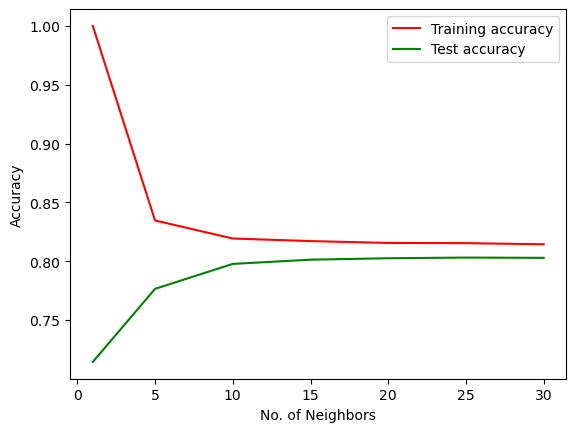

In [20]:
# plotting figures
import matplotlib.pyplot as plt

plt.figure()
plt.plot(k_neighbors, train_accuracy_knn, c='r', label='Training accuracy')
plt.plot(k_neighbors, test_accuracy_knn, c='g', label='Test accuracy')
plt.xlabel('No. of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
# chart 2 - Decision Tree using the same set of input features as KNN
# library for Decision Tree
from sklearn import tree

dt_depths = [i*2 for i in range(1, 20)]
train_accuracy_dt = []
test_accuracy_dt = []

for dt_depth in dt_depths:
    dtc = tree.DecisionTreeClassifier(max_depth=dt_depth)
    dtc.fit(X_train, y_train)
    train_accuracy_dt.append(dtc.score(X_train, y_train))
    test_accuracy_dt.append(dtc.score(X_test, y_test))

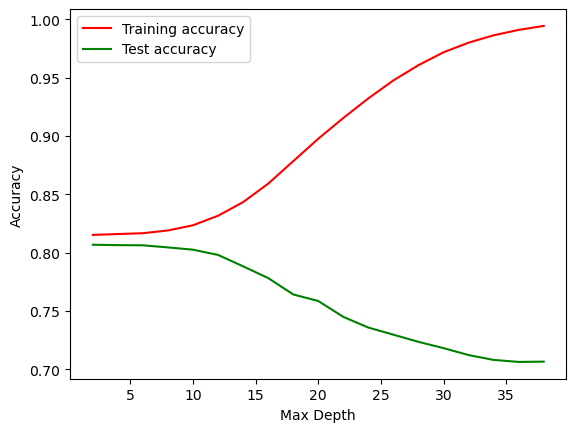

In [22]:
# plotting figures
import matplotlib.pyplot as plt

plt.figure()
plt.plot(dt_depths, train_accuracy_dt, c='r', label='Training accuracy')
plt.plot(dt_depths, test_accuracy_dt, c='g', label='Test accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
# chart 3 - Decision Tree without scaling

# split the non-scaled datasets into training set and test set
X_2_train = df_train_final.drop(columns='bad_loans')
X_2_test = df_test_final.drop(columns='bad_loans')
y_2_train = df_train_final['bad_loans']
y_2_test = df_test_final['bad_loans']

# check the training set and test set
print("X_2_train", X_2_train.shape)
print("X_2_test", X_2_test.shape)
print("y_2_train", y_2_train.shape)
print("y_2_test", y_2_test.shape)

X_2_train (110346, 25)
X_2_test (12261, 25)
y_2_train (110346,)
y_2_test (12261,)


In [24]:
train_accuracy_dt2 = []
test_accuracy_dt2 = []

for dt_depth in dt_depths:
    dtc = tree.DecisionTreeClassifier(max_depth=dt_depth)
    dtc.fit(X_2_train, y_2_train)
    train_accuracy_dt2.append(dtc.score(X_2_train, y_2_train))
    test_accuracy_dt2.append(dtc.score(X_2_test, y_2_test))

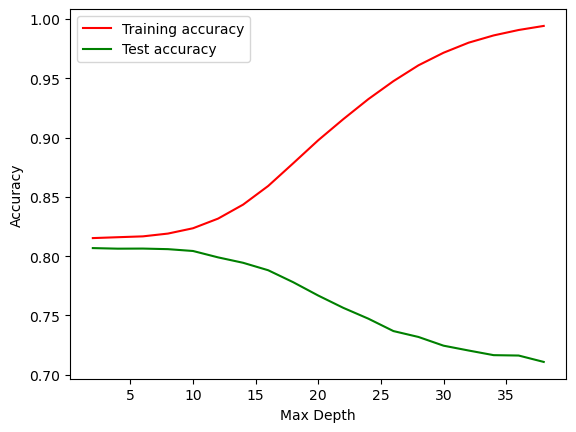

In [25]:
# plotting figures
plt.figure()
plt.plot(dt_depths, train_accuracy_dt2, c='r', label='Training accuracy')
plt.plot(dt_depths, test_accuracy_dt2, c='g', label='Test accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

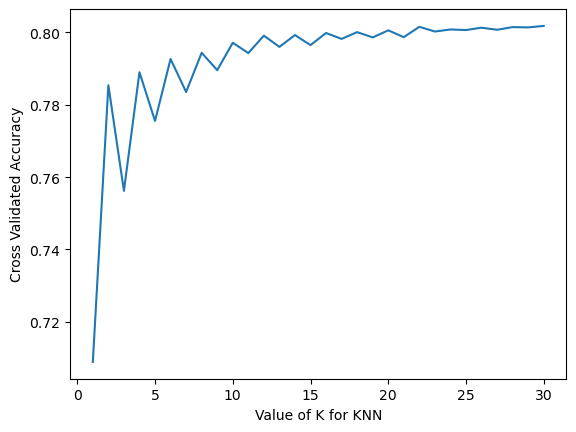

In [26]:
# use 10-fold cross validation to calculate accuracy
from sklearn.model_selection import cross_val_score

k_range = range(1, 31)
k_scores = []

# use iteration to calculate different k in models, then return the average accuracy based on cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_test, y_test, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    
# plotting figures
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Validated Accuracy')
plt.show()

In [27]:
# if we use GridSearchCV with cv=10
from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_test, y_test)
grid.best_params_

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

{'n_neighbors': 30}

In [28]:
print("Accuracy on training set: {:.3f}".format(grid.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(grid.score(X_test, y_test)))

/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy on training set: 0.812
Accuracy on test set: 0.805


/Users/raymondlukito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


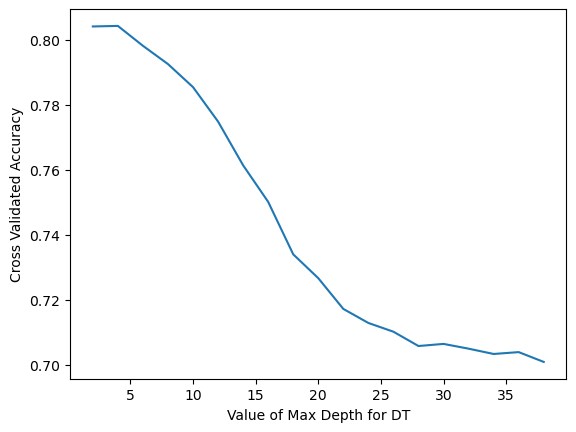

In [29]:
# identify the best parameter based on test dataset for Decision Tree 1

dt_scores = []

for dt_depth in dt_depths:
    dtc = tree.DecisionTreeClassifier(max_depth=dt_depth)
    scores = cross_val_score(dtc, X_test, y_test, cv=10, scoring='accuracy')
    dt_scores.append(scores.mean())
    
# plotting figures
plt.plot(dt_depths, dt_scores)
plt.xlabel('Value of Max Depth for DT')
plt.ylabel('Cross Validated Accuracy')
plt.show()

In [30]:
# if we use GridSearchCV with cv=10
decision_tree = tree.DecisionTreeClassifier()
param_grid_dt = dict(max_depth=dt_depths)
grid2 = GridSearchCV(decision_tree, param_grid_dt, cv=10, scoring='accuracy')
grid2.fit(X_test, y_test)
grid2.best_params_

{'max_depth': 4}

In [31]:
print("Accuracy on training set: {:.3f}".format(grid2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(grid2.score(X_test, y_test)))

Accuracy on training set: 0.815
Accuracy on test set: 0.809


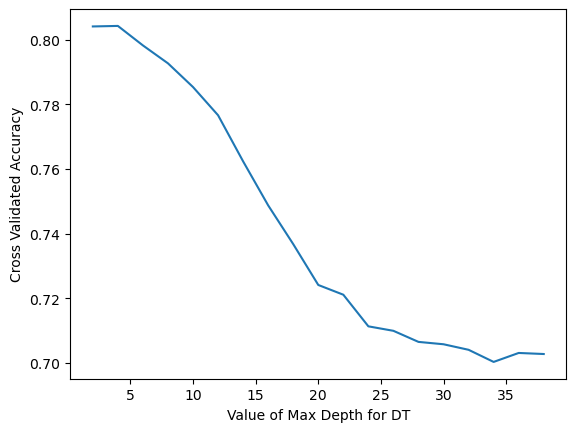

In [32]:
# identify the best parameter based on test dataset for Decision Tree 2

dt2_scores = []

for dt_depth in dt_depths:
    dtc = tree.DecisionTreeClassifier(max_depth=dt_depth)
    scores = cross_val_score(dtc, X_2_test, y_2_test, cv=10, scoring='accuracy')
    dt2_scores.append(scores.mean())
    
# plotting figures
plt.plot(dt_depths, dt2_scores)
plt.xlabel('Value of Max Depth for DT')
plt.ylabel('Cross Validated Accuracy')
plt.show()

In [33]:
# if we use GridSearchCV with cv=10
decision_tree2 = tree.DecisionTreeClassifier()
grid3 = GridSearchCV(decision_tree2, param_grid_dt, cv=10, scoring='accuracy')
grid3.fit(X_2_test, y_2_test)
grid3.best_params_

{'max_depth': 4}

In [34]:
print("Accuracy on training set: {:.3f}".format(grid3.score(X_2_train, y_2_train)))
print("Accuracy on test set: {:.3f}".format(grid3.score(X_2_test, y_2_test)))

Accuracy on training set: 0.815
Accuracy on test set: 0.809
